# importing the libaries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
import json

# importing the data:

In [3]:
df = pd.read_csv(r'C:\Users\Datasets\Churn_Modelling.csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# EDA:

# 1.understanding the data:

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()              # numeric columns

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [8]:
df.shape

(10000, 14)

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# 2.checking unique values:

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# 3.checking null values:

In [11]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.isna().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

# 4.checking duplicates values:

In [13]:
df[df.duplicated()]         # no duplicates data present

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

# 5.numeric columns and categorical columns:

In [14]:
df.describe(include='int')            # numeric columns

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

       NumOfProducts    HasCrCard  IsActiveMember        Exited  
count   10000.000000  10000.00000    10000.000000  10000.000000  
mean        1.530200      0.70550        0.515100      0.203700  
std         0.581654      0.45584        0.499797      0.402769  
min         1.000000      0.00000        0.000000      0.000000  
25%         1.000000      0.00000        0.000000      0.000000  
50%         1.000000      1.00000        1.000000      0.000000  
75%         2.000000      1.00000        1.000000      0.000000  
max         4.000000      1.00000        1.000000      1.000000

In [15]:
df.describe(include='object')           # categorical columns

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

# 6.univariant and bivariant analysis:

# univariate analysis:

# 1.univariant analysis for numeric columns

In [16]:
numeric_columns = df[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']]
numeric_columns

CreditScore  Age  Tenure  NumOfProducts    Balance  EstimatedSalary
0             619   42       2              1       0.00        101348.88
1             608   41       1              1   83807.86        112542.58
2             502   42       8              3  159660.80        113931.57
3             699   39       1              2       0.00         93826.63
4             850   43       2              1  125510.82         79084.10
...           ...  ...     ...            ...        ...              ...
9995          771   39       5              2       0.00         96270.64
9996          516   35      10              1   57369.61        101699.77
9997          709   36       7              1       0.00         42085.58
9998          772   42       3              2   75075.31         92888.52
9999          792   28       4              1  130142.79         38190.78

[10000 rows x 6 columns]

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

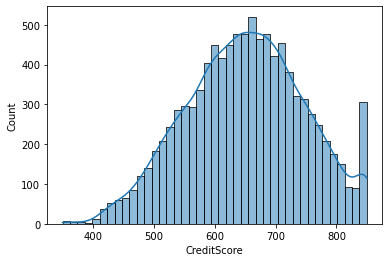

In [17]:
sns.histplot(numeric_columns.CreditScore,kde=True)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

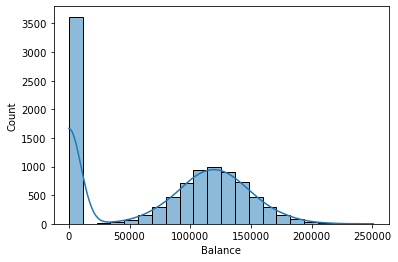

In [18]:
sns.histplot(numeric_columns.Balance,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

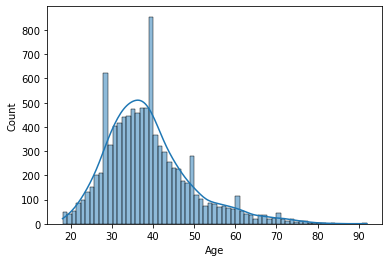

In [19]:
sns.histplot(numeric_columns.Age,kde=True)

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

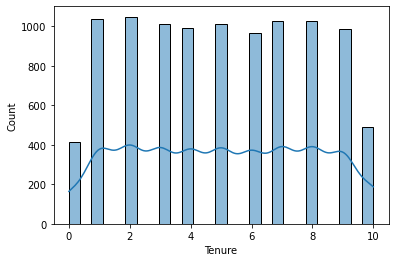

In [20]:
sns.histplot(numeric_columns.Tenure,kde=True)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Count'>

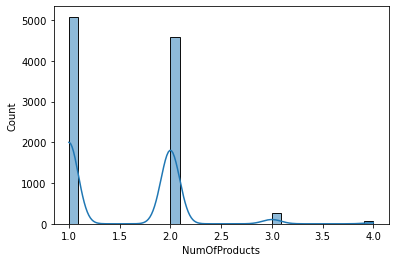

In [21]:
sns.histplot(numeric_columns.NumOfProducts,kde=True)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

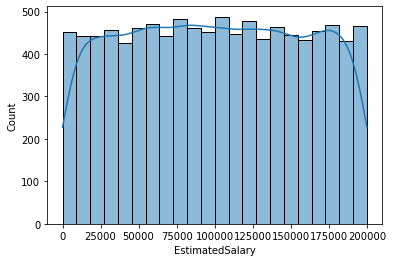

In [22]:
sns.histplot(numeric_columns.EstimatedSalary,kde=True)

# 2.univariate analysis for categorical columns

In [23]:
categorical_columns = df[['HasCrCard','IsActiveMember','Geography','Gender','Exited']]
categorical_columns

HasCrCard  IsActiveMember Geography  Gender  Exited
0             1               1    France  Female       1
1             0               1     Spain  Female       0
2             1               0    France  Female       1
3             0               0    France  Female       0
4             1               1     Spain  Female       0
...         ...             ...       ...     ...     ...
9995          1               0    France    Male       0
9996          1               1    France    Male       0
9997          0               1    France  Female       1
9998          1               0   Germany    Male       1
9999          1               0    France  Female       0

[10000 rows x 5 columns]

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

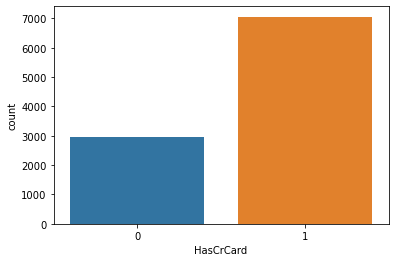

In [24]:
sns.countplot(categorical_columns.HasCrCard)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

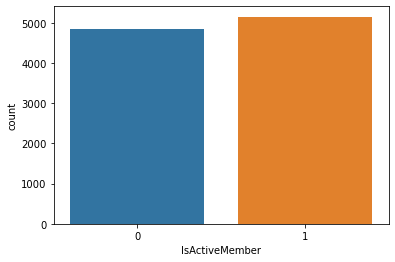

In [25]:
sns.countplot(categorical_columns.IsActiveMember)

<AxesSubplot:xlabel='Geography', ylabel='count'>

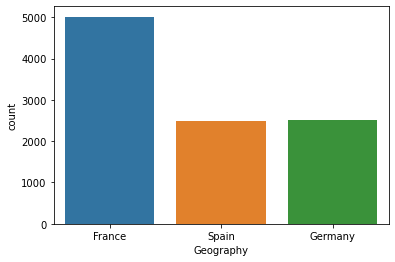

In [26]:
sns.countplot(categorical_columns.Geography)

<AxesSubplot:xlabel='Gender', ylabel='count'>

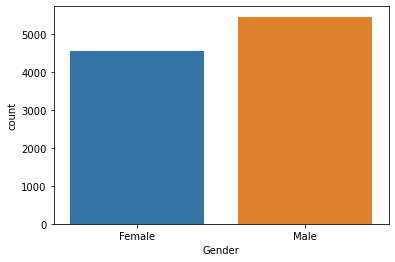

In [27]:
sns.countplot(categorical_columns.Gender)

<AxesSubplot:xlabel='Exited', ylabel='count'>

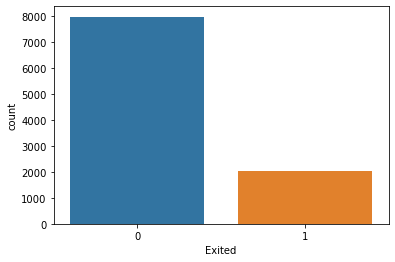

In [28]:
sns.countplot(categorical_columns.Exited)

# bivariate analysis:

# bivariate analysis for numeric columns

In [29]:
numeric_columns = df[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']]
numeric_columns

CreditScore  Age  Tenure  NumOfProducts    Balance  EstimatedSalary
0             619   42       2              1       0.00        101348.88
1             608   41       1              1   83807.86        112542.58
2             502   42       8              3  159660.80        113931.57
3             699   39       1              2       0.00         93826.63
4             850   43       2              1  125510.82         79084.10
...           ...  ...     ...            ...        ...              ...
9995          771   39       5              2       0.00         96270.64
9996          516   35      10              1   57369.61        101699.77
9997          709   36       7              1       0.00         42085.58
9998          772   42       3              2   75075.31         92888.52
9999          792   28       4              1  130142.79         38190.78

[10000 rows x 6 columns]

In [30]:
numeric_columns.corr()         # cant see strong corelation between two numeric columns

CreditScore       Age    Tenure  NumOfProducts   Balance  \
CreditScore         1.000000 -0.003965  0.000842       0.012238  0.006268   
Age                -0.003965  1.000000 -0.009997      -0.030680  0.028308   
Tenure              0.000842 -0.009997  1.000000       0.013444 -0.012254   
NumOfProducts       0.012238 -0.030680  0.013444       1.000000 -0.304180   
Balance             0.006268  0.028308 -0.012254      -0.304180  1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784       0.014204  0.012797   

                 EstimatedSalary  
CreditScore            -0.001384  
Age                    -0.007201  
Tenure                  0.007784  
NumOfProducts           0.014204  
Balance                 0.012797  
EstimatedSalary         1.000000

# checking correlation using scatterplot

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

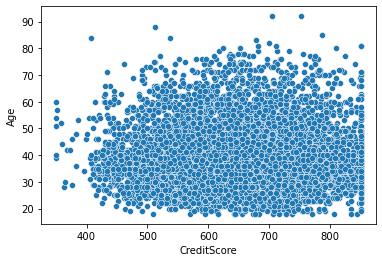

In [31]:
sns.scatterplot(numeric_columns.CreditScore,numeric_columns.Age)

<AxesSubplot:xlabel='CreditScore', ylabel='Balance'>

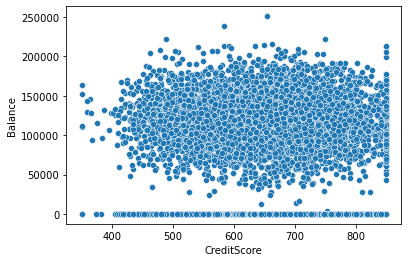

In [32]:
sns.scatterplot(numeric_columns.CreditScore,numeric_columns.Balance)

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

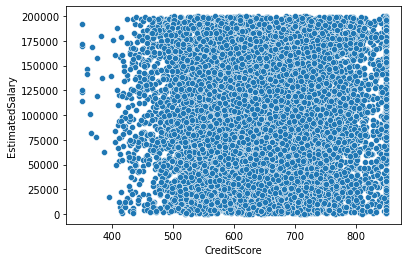

In [33]:
sns.scatterplot(numeric_columns.CreditScore,numeric_columns.EstimatedSalary)

# bivariate analysis for categorical columns

In [34]:
categorical_columns = df[['HasCrCard','IsActiveMember','Geography','Gender','Exited']]
categorical_columns

HasCrCard  IsActiveMember Geography  Gender  Exited
0             1               1    France  Female       1
1             0               1     Spain  Female       0
2             1               0    France  Female       1
3             0               0    France  Female       0
4             1               1     Spain  Female       0
...         ...             ...       ...     ...     ...
9995          1               0    France    Male       0
9996          1               1    France    Male       0
9997          0               1    France  Female       1
9998          1               0   Germany    Male       1
9999          1               0    France  Female       0

[10000 rows x 5 columns]

<AxesSubplot:xlabel='Gender', ylabel='count'>

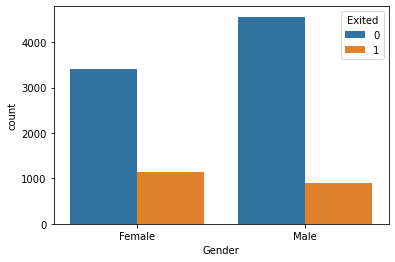

In [35]:
sns.countplot(data=categorical_columns,x='Gender',hue='Exited')

<AxesSubplot:xlabel='Geography', ylabel='count'>

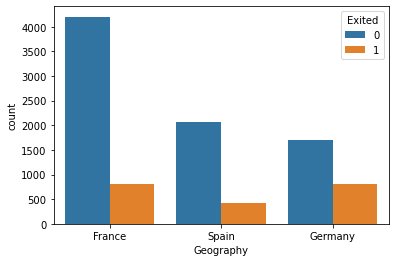

In [36]:
sns.countplot(data=categorical_columns,x='Geography',hue='Exited')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

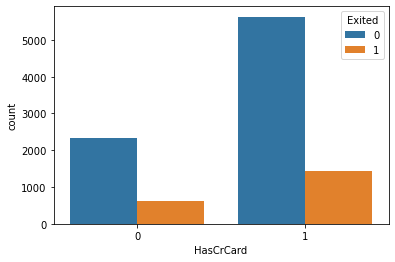

In [37]:
sns.countplot(data=categorical_columns,x='HasCrCard',hue='Exited')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

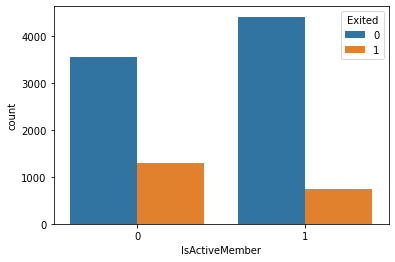

In [38]:
sns.countplot(data=categorical_columns,x='IsActiveMember',hue='Exited')

# 7.knowing the percentage of classification in churn using pie chart:

In [39]:
churn_count = df['Exited'].value_counts()
churn_count

0    7963
1    2037
Name: Exited, dtype: int64

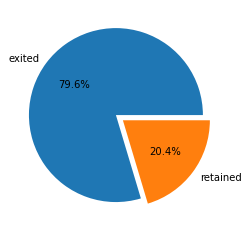

In [40]:
plt.pie(x=churn_count,explode=(0,0.1),labels=['exited','retained'],autopct='%1.1f%%')
plt.show()

# 8.knowing the percentage of classification in churn using countplot chart:

<AxesSubplot:xlabel='Exited', ylabel='count'>

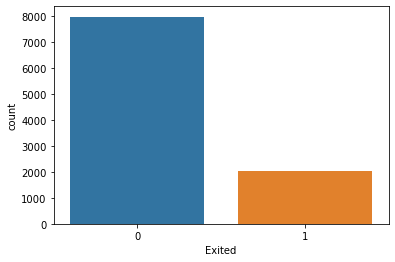

In [41]:
sns.countplot(categorical_columns.Exited)

# 9.knowing the relation between each features using pair plot:

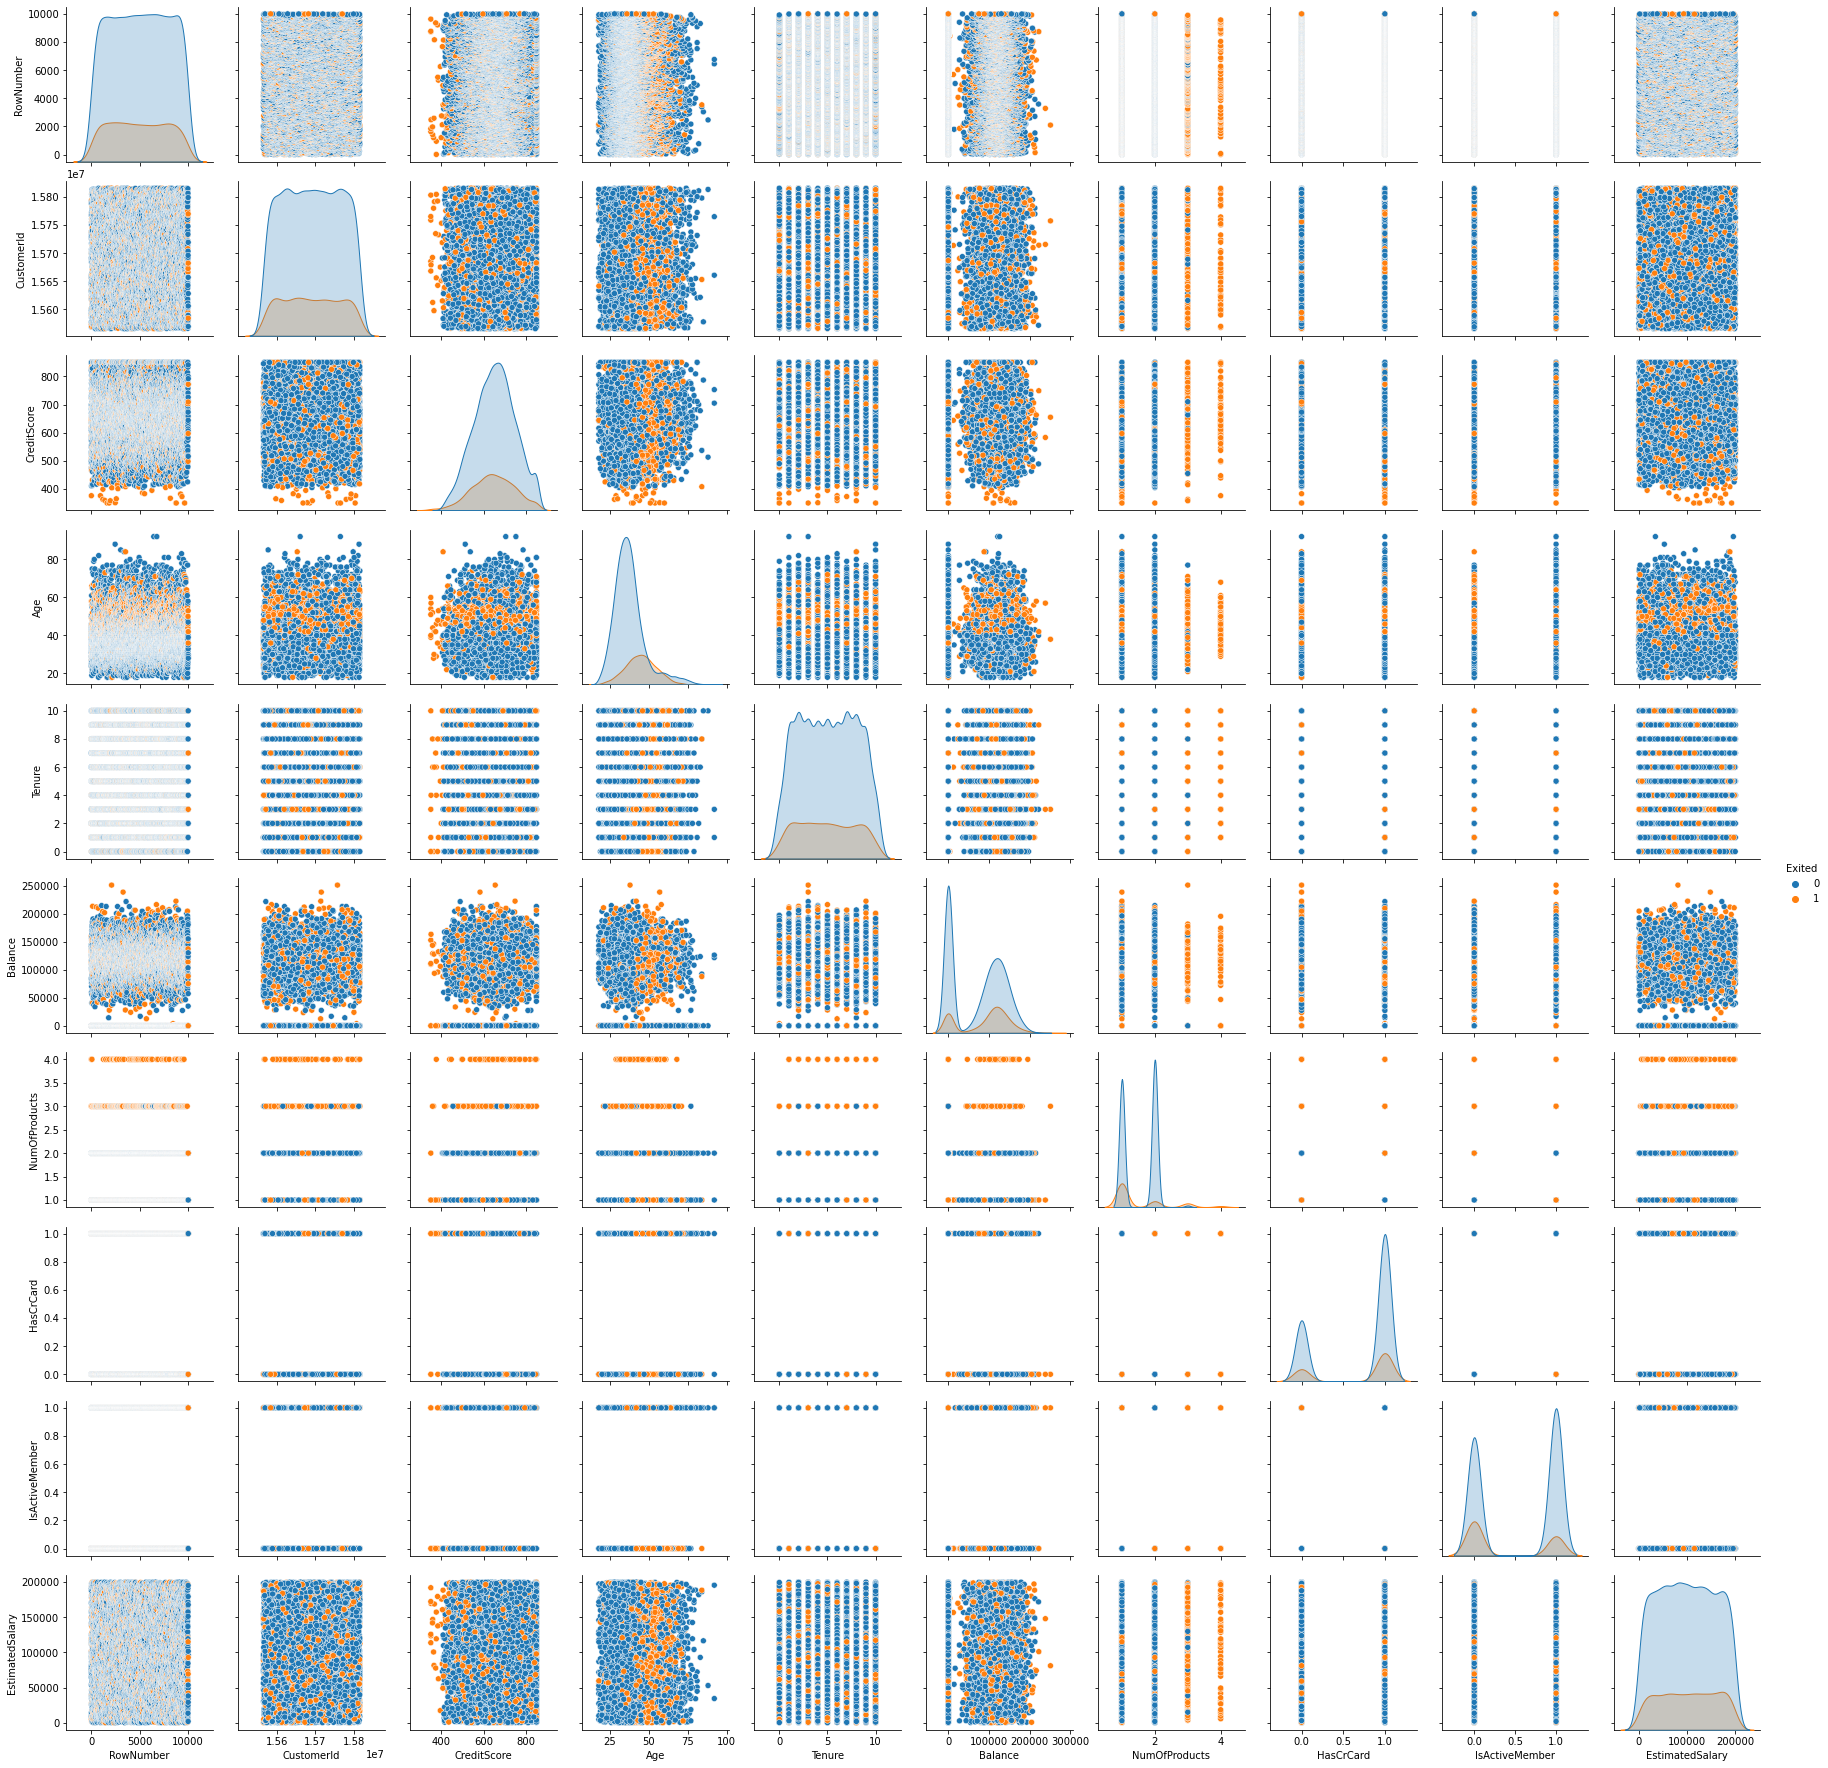

In [42]:
sns.pairplot(data=df,hue='Exited')
plt.show()

# 10.knowing the distribution of numeric columns:

<AxesSubplot:xlabel='CreditScore'>

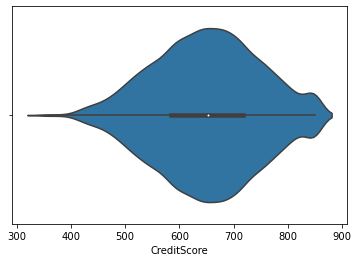

In [42]:
sns.violinplot(numeric_columns['CreditScore'])

<AxesSubplot:xlabel='Age'>

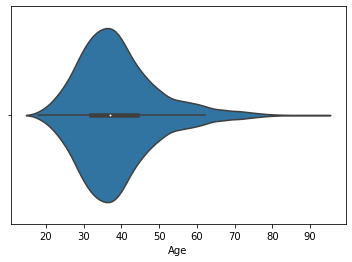

In [43]:
sns.violinplot(numeric_columns['Age'])

<AxesSubplot:xlabel='Tenure'>

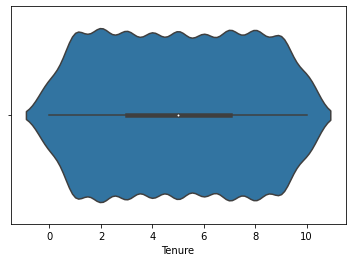

In [44]:
sns.violinplot(numeric_columns['Tenure'])

<AxesSubplot:xlabel='Balance'>

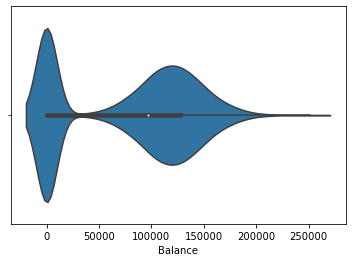

In [45]:
sns.violinplot(numeric_columns['Balance'])

<AxesSubplot:xlabel='NumOfProducts'>

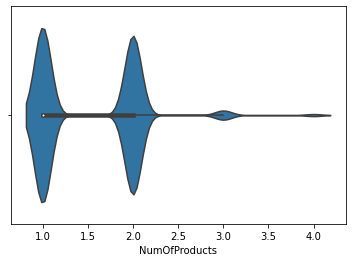

In [46]:
sns.violinplot(numeric_columns['NumOfProducts'])

<AxesSubplot:xlabel='EstimatedSalary'>

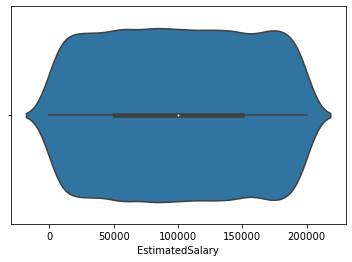

In [47]:
sns.violinplot(numeric_columns['EstimatedSalary'])

# 11.detect outliers:

In [48]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

<AxesSubplot:xlabel='CreditScore'>

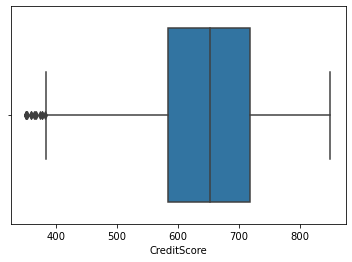

In [49]:
sns.boxplot(df['CreditScore'])     #outliers present

<AxesSubplot:xlabel='Age'>

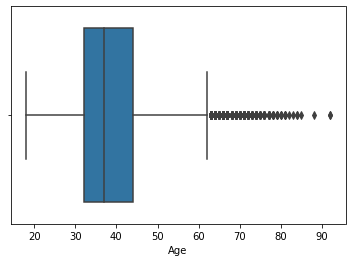

In [50]:
sns.boxplot(df['Age'])        #outliers present

<AxesSubplot:xlabel='Tenure'>

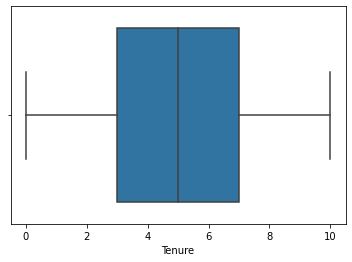

In [51]:
sns.boxplot(df['Tenure'])        #outliers not present

<AxesSubplot:xlabel='Balance'>

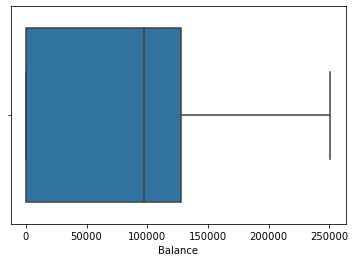

In [52]:
sns.boxplot(df['Balance'])       #outliers not present

<AxesSubplot:xlabel='NumOfProducts'>

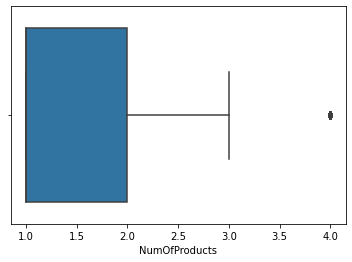

In [53]:
sns.boxplot(df['NumOfProducts'])        #outliers present

<AxesSubplot:xlabel='EstimatedSalary'>

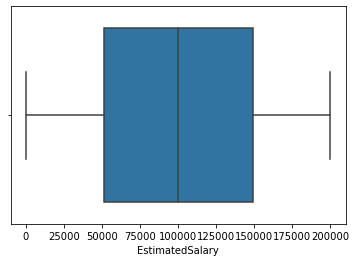

In [54]:
sns.boxplot(df['EstimatedSalary'])          #outliers not present

# EDA with PandasProfiling:

In [55]:
report = ProfileReport(df,title='pandas_profiling')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# report.to_notebook_iframe()

In [ ]:
report.to_file('complaints.html')

# Feature Engg.:

In [56]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [57]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)      # drop irrevalant features

In [58]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

# one hot encoding:

In [59]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [60]:
df = pd.get_dummies(df,columns=['Geography'])
df

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619  Female   42       2       0.00              1          1   
1             608  Female   41       1   83807.86              1          0   
2             502  Female   42       8  159660.80              3          1   
3             699  Female   39       1       0.00              2          0   
4             850  Female   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771    Male   39       5       0.00              2          1   
9996          516    Male   35      10   57369.61              1          1   
9997          709  Female   36       7       0.00              1          0   
9998          772    Male   42       3   75075.31              2          1   
9999          792  Female   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1                 1   
1                  1        112542.58       0                 0   
2                  0        113931.57       1                 1   
3                  0         93826.63       0                 1   
4                  1         79084.10       0                 0   
...              ...              ...     ...               ...   
9995               0         96270.64       0                 1   
9996               1        101699.77       0                 1   
9997               1         42085.58       1                 1   
9998               0         92888.52       1                 0   
9999               0         38190.78       0                 1   

      Geography_Germany  Geography_Spain  
0                     0                0  
1                     0                1  
2                     0                0  
3                     0                0  
4                     0                1  
...                 ...              ...  
9995                  0                0  
9996                  0                0  
9997                  0                0  
9998                  1                0  
9999                  0                0  

[10000 rows x 13 columns]

# label encoding:

In [61]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})
df['Gender']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

In [62]:
df

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       1   42       2       0.00              1          1   
1             608       1   41       1   83807.86              1          0   
2             502       1   42       8  159660.80              3          1   
3             699       1   39       1       0.00              2          0   
4             850       1   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       0   39       5       0.00              2          1   
9996          516       0   35      10   57369.61              1          1   
9997          709       1   36       7       0.00              1          0   
9998          772       0   42       3   75075.31              2          1   
9999          792       1   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1                 1   
1                  1        112542.58       0                 0   
2                  0        113931.57       1                 1   
3                  0         93826.63       0                 1   
4                  1         79084.10       0                 0   
...              ...              ...     ...               ...   
9995               0         96270.64       0                 1   
9996               1        101699.77       0                 1   
9997               1         42085.58       1                 1   
9998               0         92888.52       1                 0   
9999               0         38190.78       0                 1   

      Geography_Germany  Geography_Spain  
0                     0                0  
1                     0                1  
2                     0                0  
3                     0                0  
4                     0                1  
...                 ...              ...  
9995                  0                0  
9996                  0                0  
9997                  0                0  
9998                  1                0  
9999                  0                0  

[10000 rows x 13 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [64]:
# change datatype of features to int

In [65]:
df['Geography_France'] = df['Geography_France'].astype(int)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)
df['Age'] = df['Age'].astype(int)
df['CreditScore'] = df['CreditScore'].astype(int)

In [66]:
df

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0             619       1   42       2        0              1          1   
1             608       1   41       1    83807              1          0   
2             502       1   42       8   159660              3          1   
3             699       1   39       1        0              2          0   
4             850       1   43       2   125510              1          1   
...           ...     ...  ...     ...      ...            ...        ...   
9995          771       0   39       5        0              2          1   
9996          516       0   35      10    57369              1          1   
9997          709       1   36       7        0              1          0   
9998          772       0   42       3    75075              2          1   
9999          792       1   28       4   130142              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1           101348       1                 1   
1                  1           112542       0                 0   
2                  0           113931       1                 1   
3                  0            93826       0                 1   
4                  1            79084       0                 0   
...              ...              ...     ...               ...   
9995               0            96270       0                 1   
9996               1           101699       0                 1   
9997               1            42085       1                 1   
9998               0            92888       1                 0   
9999               0            38190       0                 1   

      Geography_Germany  Geography_Spain  
0                     0                0  
1                     0                1  
2                     0                0  
3                     0                0  
4                     0                1  
...                 ...              ...  
9995                  0                0  
9996                  0                0  
9997                  0                0  
9998                  1                0  
9999                  0                0  

[10000 rows x 13 columns]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        10000 non-null  int32
 1   Gender             10000 non-null  int64
 2   Age                10000 non-null  int32
 3   Tenure             10000 non-null  int64
 4   Balance            10000 non-null  int32
 5   NumOfProducts      10000 non-null  int64
 6   HasCrCard          10000 non-null  int64
 7   IsActiveMember     10000 non-null  int64
 8   EstimatedSalary    10000 non-null  int32
 9   Exited             10000 non-null  int64
 10  Geography_France   10000 non-null  int32
 11  Geography_Germany  10000 non-null  int32
 12  Geography_Spain    10000 non-null  int32
dtypes: int32(7), int64(6)
memory usage: 742.3 KB


# Handling missing values:

In [68]:
df.isna().sum()     # there is no missing values are present

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

# Handling outliers:

# 1.detect range of outliers using IQR method:

# CreditScore:

In [69]:
outliers_feat = ['CreditScore','Age','NumOfProducts']

q1 = df['CreditScore'].quantile(0.25)
print(f'q1 = {q1}')
q3 = df['CreditScore'].quantile(0.75)
print(f'q3 = {q3}')

iqr=q3-q1
print(f'iqr = {iqr}')

upper_limit1 = q3 + 1.5*(iqr)
print(f'upper_limit1 = {upper_limit1}')

lower_limit1 = q1 - 1.5*(iqr)
print(f'lower_limit1 = {lower_limit1}')

q1 = 584.0
q3 = 718.0
iqr = 134.0
upper_limit1 = 919.0
lower_limit1 = 383.0


In [70]:
df.loc[(df['CreditScore']<lower_limit1)|(df['CreditScore']>upper_limit1)]

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
7             376       1   29       4   115046              4          1   
942           376       1   46       6        0              1          1   
1193          363       1   28       6   146098              3          1   
1405          359       1   44       6   128747              1          1   
1631          350       0   54       1   152677              1          1   
1838          350       0   39       0   109733              2          0   
1962          358       1   52       8   143542              3          1   
2473          351       1   57       4   163146              1          1   
2579          365       0   30       0   127760              1          1   
8154          367       0   42       6    93608              1          1   
8723          350       0   51      10        0              1          1   
8762          350       1   60       3        0              1          0   
9210          382       0   36       0        0              1          1   
9356          373       0   42       7        0              1          1   
9624          350       1   40       0   111098              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
7                  0           119346       1                 0   
942                0           157333       1                 1   
1193               0           100615       1                 0   
1405               0           146955       1                 1   
1631               1           191973       1                 0   
1838               0           123602       1                 0   
1962               0           141959       1                 0   
2473               0           169621       1                 0   
2579               0            81537       1                 0   
8154               0           168816       1                 0   
8723               1           125823       1                 1   
8762               0           113796       1                 1   
9210               1           179540       1                 0   
9356               0            77786       1                 1   
9624               1           172321       1                 1   

      Geography_Germany  Geography_Spain  
7                     1                0  
942                   0                0  
1193                  0                1  
1405                  0                0  
1631                  0                1  
1838                  1                0  
1962                  0                1  
2473                  1                0  
2579                  1                0  
8154                  0                1  
8723                  0                0  
8762                  0                0  
9210                  0                1  
9356                  0                0  
9624                  0                0

In [71]:
df.loc[(df['CreditScore']<lower_limit1)|(df['CreditScore']>upper_limit1)].shape

(15, 13)

# Age:

In [72]:
q1 = df['Age'].quantile(0.25)
print(f'q1 = {q1}')
q3 = df['Age'].quantile(0.75)
print(f'q3 = {q3}')

iqr=q3-q1
print(f'iqr = {iqr}')

upper_limit2 = q3 + 1.5*(iqr)
print(f'upper_limit2 = {upper_limit2}')

lower_limit2 = q1 - 1.5*(iqr)
print(f'lower_limit2 = {lower_limit2}')

q1 = 32.0
q3 = 44.0
iqr = 12.0
upper_limit2 = 62.0
lower_limit2 = 14.0


In [73]:
df.loc[(df['Age']<lower_limit2)|(df['Age']>upper_limit2)]

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
58            511       1   66       4        0              1          1   
85            652       1   75      10        0              2          1   
104           670       1   65       1        0              1          1   
158           646       1   73       6    97259              1          0   
181           510       0   65       2        0              2          1   
...           ...     ...  ...     ...      ...            ...        ...   
9753          656       0   68       7   153545              1          1   
9765          445       0   64       2   136770              1          0   
9832          595       1   64       2   105736              1          1   
9894          521       1   77       6        0              2          1   
9936          609       0   77       1        0              1          0   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
58                 0             1643       1                 0   
85                 1           114675       0                 0   
104                1           177655       1                 0   
158                1           104719       0                 1   
181                1            48071       0                 1   
...              ...              ...     ...               ...   
9753               1           186574       0                 0   
9765               1            43678       0                 1   
9832               1            89935       1                 0   
9894               1            49054       0                 1   
9936               1            18708       0                 1   

      Geography_Germany  Geography_Spain  
58                    0                1  
85                    0                1  
104                   0                1  
158                   0                0  
181                   0                0  
...                 ...              ...  
9753                  1                0  
9765                  0                0  
9832                  1                0  
9894                  0                0  
9936                  0                0  

[359 rows x 13 columns]

In [74]:
df.loc[(df['Age']<lower_limit2)|(df['Age']>upper_limit2)].shape

(359, 13)

# Impute outliers using mean:

# CreditScore:

In [75]:
df['CreditScore'].mean()

650.5288

In [76]:
df['CreditScore'] = np.where(df['CreditScore']<lower_limit1,df['CreditScore'].mean(),np.where(df['CreditScore']>upper_limit1,df['CreditScore'].mean,df['CreditScore']))
df['CreditScore']

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: object

In [77]:
df.loc[[7,942]]

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
7      650.5288       1   29       4   115046              4          1   
942    650.5288       1   46       6        0              1          1   

     IsActiveMember  EstimatedSalary  Exited  Geography_France  \
7                 0           119346       1                 0   
942               0           157333       1                 1   

     Geography_Germany  Geography_Spain  
7                    1                0  
942                  0                0

# Age:

In [78]:
df['Age'].mean()

38.9218

In [79]:
df['Age'] = np.where(df['Age']<lower_limit2,df['Age'].mean(),np.where(df['Age']>upper_limit2,df['Age'].mean(),df['Age']))
df['Age']

0       42.0
1       41.0
2       42.0
3       39.0
4       43.0
        ... 
9995    39.0
9996    35.0
9997    36.0
9998    42.0
9999    28.0
Name: Age, Length: 10000, dtype: float64

In [80]:
df.loc[[58,85]]

CreditScore  Gender      Age  Tenure  Balance  NumOfProducts  HasCrCard  \
58         511       1  38.9218       4        0              1          1   
85         652       1  38.9218      10        0              2          1   

    IsActiveMember  EstimatedSalary  Exited  Geography_France  \
58               0             1643       1                 0   
85               1           114675       0                 0   

    Geography_Germany  Geography_Spain  
58                  0                1  
85                  0                1

In [81]:
# clean data with no outliers , data types of all features is int and no null values

In [82]:
df

CreditScore  Gender   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0            619       1  42.0       2        0              1          1   
1            608       1  41.0       1    83807              1          0   
2            502       1  42.0       8   159660              3          1   
3            699       1  39.0       1        0              2          0   
4            850       1  43.0       2   125510              1          1   
...          ...     ...   ...     ...      ...            ...        ...   
9995         771       0  39.0       5        0              2          1   
9996         516       0  35.0      10    57369              1          1   
9997         709       1  36.0       7        0              1          0   
9998         772       0  42.0       3    75075              2          1   
9999         792       1  28.0       4   130142              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1           101348       1                 1   
1                  1           112542       0                 0   
2                  0           113931       1                 1   
3                  0            93826       0                 1   
4                  1            79084       0                 0   
...              ...              ...     ...               ...   
9995               0            96270       0                 1   
9996               1           101699       0                 1   
9997               1            42085       1                 1   
9998               0            92888       1                 0   
9999               0            38190       0                 1   

      Geography_Germany  Geography_Spain  
0                     0                0  
1                     0                1  
2                     0                0  
3                     0                0  
4                     0                1  
...                 ...              ...  
9995                  0                0  
9996                  0                0  
9997                  0                0  
9998                  1                0  
9999                  0                0  

[10000 rows x 13 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  object 
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  int32  
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  int32  
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(1), int32(5), int64(6), object(1)
memory usage: 820.4+ KB


# Sampling of dataset:

In [84]:
df['Exited'].value_counts()  

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

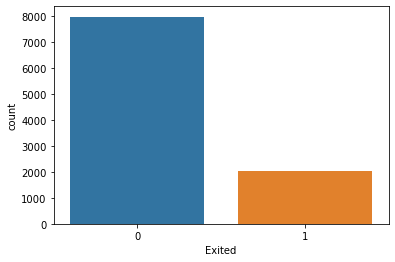

In [85]:
sns.countplot(df.Exited)     # it is imbalance dataset      

# balancing dataset using RandomOverSampling:

In [86]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [87]:
oversample = RandomOverSampler(sampling_strategy=1)
x_over, y_over = oversample.fit_resample(x, y)
y_over.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

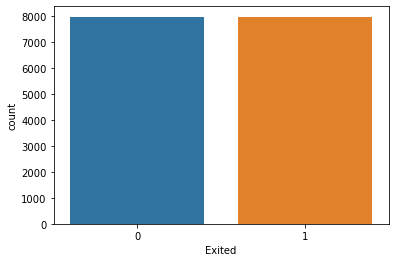

In [88]:
sns.countplot(y_over)    # balance dataset 

# Model Training:

In [89]:
x = x_over
y = y_over

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train

CreditScore  Gender      Age  Tenure  Balance  NumOfProducts  HasCrCard  \
14665         754       0  61.0000       5   146622              1          1   
6476          739       0  40.0000       4        0              2          0   
4925          817       0  58.0000       3   114327              2          1   
14150         782       1  38.9218       5   148666              1          1   
12173         654       0  40.0000       6        0              1          0   
...           ...     ...      ...     ...      ...            ...        ...   
11633         606       0  37.0000       6    82373              1          0   
1344          460       1  40.0000       6   119507              2          1   
12815         681       0  49.0000       8   142946              1          0   
7293          709       1  34.0000       2   111669              1          1   
1289          672       0  40.0000      10   102980              1          1   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
14665               1            41815                 1                  0   
6476                0           173321                 1                  0   
4925                1            42831                 0                  1   
14150               0             2605                 0                  1   
12173               0           183872                 1                  0   
...               ...              ...               ...                ...   
11633               0           172526                 1                  0   
1344                0            91560                 0                  1   
12815               0           187280                 0                  1   
7293                0            57029                 1                  0   
1289                0             1285                 0                  1   

       Geography_Spain  
14665                0  
6476                 0  
4925                 0  
14150                0  
12173                0  
...                ...  
11633                0  
1344                 0  
12815                0  
7293                 0  
1289                 0  

[12740 rows x 12 columns]

In [90]:
y_train

14665    1
6476     0
4925     0
14150    1
12173    1
        ..
11633    1
1344     1
12815    1
7293     0
1289     1
Name: Exited, Length: 12740, dtype: int64

In [91]:
x_test

CreditScore  Gender      Age  Tenure  Balance  NumOfProducts  HasCrCard  \
145           485       1  21.0000       5   113157              1          1   
7025          569       1  51.0000       3        0              3          1   
12550         622       1  34.0000       7    98675              1          1   
8798          543       0  23.0000       5        0              2          1   
2625          567       0  29.0000       5   129750              1          1   
...           ...     ...      ...     ...      ...            ...        ...   
7362          707       0  38.9218       6    66573              1          1   
4429          626       0  38.0000       7   141074              1          1   
6862          586       0  33.0000       9        0              1          1   
4485          751       0  34.0000       9   108513              2          1   
11934         731       1  49.0000       4    88826              1          1   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
145                 1            54141                 0                  0   
7025                0            75084                 0                  0   
12550               0           138906                 0                  1   
8798                0           117832                 0                  0   
2625                0           109257                 0                  1   
...               ...              ...               ...                ...   
7362                1            62768                 1                  0   
4429                0            52795                 1                  0   
6862                0             6975                 1                  0   
4485                1            27097                 0                  1   
11934               1            33759                 0                  1   

       Geography_Spain  
145                  1  
7025                 1  
12550                0  
8798                 1  
2625                 0  
...                ...  
7362                 0  
4429                 0  
6862                 0  
4485                 0  
11934                0  

[3186 rows x 12 columns]

In [92]:
y_test

145      0
7025     1
12550    1
8798     0
2625     0
        ..
7362     0
4429     1
6862     0
4485     0
11934    1
Name: Exited, Length: 3186, dtype: int64

# 1.Logistic Regression:

In [93]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

# Evaluation of model before hyperparameter tunning:

# evaluation of train dataset:

In [94]:
y_pred_train = log_reg.predict(x_train)
y_pred_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [95]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[4044, 2314],
       [2001, 4381]], dtype=int64)

In [96]:
cls_rep = classification_report(y_train,y_pred_train)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      6358
           1       0.65      0.69      0.67      6382

    accuracy                           0.66     12740
   macro avg       0.66      0.66      0.66     12740
weighted avg       0.66      0.66      0.66     12740



In [97]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.6613029827315542

# evalution of test dataset:

In [98]:
y_pred_test = log_reg.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [99]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[1051,  554],
       [ 466, 1115]], dtype=int64)

In [100]:
cls_rep = classification_report(y_test,y_pred_test)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1605
           1       0.67      0.71      0.69      1581

    accuracy                           0.68      3186
   macro avg       0.68      0.68      0.68      3186
weighted avg       0.68      0.68      0.68      3186



In [101]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.67984934086629

# hyperparameter tunning:

In [103]:
log_hyp = LogisticRegression()
hyperparameters = {'C': [0.1, 1, 10],
                  'solver': ['liblinear', 'lbfgs'],
                  'max_iter': [100]}
gscv_log_hyp = GridSearchCV(log_hyp,hyperparameters,cv=5)
gscv_log_hyp.fit(x_train,y_train)
gscv_log_hyp.best_estimator_

LogisticRegression(C=1, solver='liblinear')

In [104]:
log_hyp_model = gscv_log_hyp.best_estimator_
log_hyp_model.fit(x_train,y_train)

LogisticRegression(C=1, solver='liblinear')

# Evalution of model after hyperparameter tunning:

# evaluation of train dataset:

In [105]:
y_pred_train = log_hyp_model.predict(x_train)
y_pred_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [106]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[4082, 2276],
       [1965, 4417]], dtype=int64)

In [107]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      6358
           1       0.66      0.69      0.68      6382

    accuracy                           0.67     12740
   macro avg       0.67      0.67      0.67     12740
weighted avg       0.67      0.67      0.67     12740



In [108]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.6671114599686028

# evaluation of test dataset:

In [109]:
y_pred_test = log_hyp_model.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [110]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[1074,  531],
       [ 440, 1141]], dtype=int64)

In [111]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1605
           1       0.68      0.72      0.70      1581

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



In [112]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.6952291274325173

# 2.Decision Tree:

In [114]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Evaluation of model before hyperparameter tunning:

# evaluation for train dataset:

In [115]:
y_pred_train = dt.predict(x_train)
y_pred_train

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [116]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[6358,    0],
       [   0, 6382]], dtype=int64)

In [117]:
cls_rep = classification_report(y_train,y_pred_train)
print(cls_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6358
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



In [118]:
acc = accuracy_score(y_train,y_pred_train)
acc

1.0

# evaluation for test dataset:

In [119]:
y_pred_test = dt.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [120]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[1359,  246],
       [  22, 1559]], dtype=int64)

In [121]:
cls_rep = classification_report(y_test,y_pred_test)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1605
           1       0.86      0.99      0.92      1581

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



In [122]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.9158819836785939

# Pre-prunning method:

In [124]:
hyp_dt = DecisionTreeClassifier(random_state=10)
hyperparameters = {'criterion':['entropy','gini'],
                  'max_depth' : np.arange(4,10),
                  'min_samples_split':np.arange(4,20),
                  'min_samples_leaf':np.arange(4,10)}
gscv_dt_model = GridSearchCV(hyp_dt,hyperparameters,cv=5)
gscv_dt_model.fit(x_train,y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=15,
                       random_state=10)

In [125]:
dt_model = gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=15,
                       random_state=10)

# Evalution of model after hyperparameter tunning:

# evalution of training dataste:

In [126]:
y_pred_train = dt_model.predict(x_train)
y_pred_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [127]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[5351, 1007],
       [1188, 5194]], dtype=int64)

In [128]:
cls_rep = classification_report(y_train,y_pred_train)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6358
           1       0.84      0.81      0.83      6382

    accuracy                           0.83     12740
   macro avg       0.83      0.83      0.83     12740
weighted avg       0.83      0.83      0.83     12740



In [129]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.8277080062794349

# evalution of test dataset:

In [130]:
y_pred_test = dt_model.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [131]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[1313,  292],
       [ 341, 1240]], dtype=int64)

In [132]:
cls_rep = classification_report(y_test,y_pred_test)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1605
           1       0.81      0.78      0.80      1581

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [133]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.8013182674199624

# Post-prunning:

In [135]:
prunning_model = DecisionTreeClassifier(random_state=10)
path = prunning_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [136]:
ccp_alphas

array([0.00000000e+00, 5.10204082e-05, 5.12606927e-05, 5.19291686e-05,
       5.19321948e-05, 5.19931839e-05, 6.27943485e-05, 6.72796591e-05,
       6.72796591e-05, 6.86813187e-05, 6.86980907e-05, 6.97714983e-05,
       6.97714983e-05, 7.06436421e-05, 7.11473710e-05, 7.13572142e-05,
       7.13572142e-05, 7.13572142e-05, 7.13572142e-05, 7.13572142e-05,
       7.19518577e-05, 7.19518577e-05, 7.19518577e-05, 7.19518577e-05,
       7.19518577e-05, 7.22135008e-05, 7.24550175e-05, 7.24550175e-05,
       7.24550175e-05, 7.24550175e-05, 7.24550175e-05, 7.24751439e-05,
       7.28862974e-05, 7.28862974e-05, 7.28862974e-05, 7.28862974e-05,
       7.28862974e-05, 7.32600733e-05, 7.32600733e-05, 7.32600733e-05,
       7.32600733e-05, 7.32600733e-05, 7.32600733e-05, 7.32600733e-05,
       7.35871272e-05, 7.35871272e-05, 7.41322170e-05, 7.43617285e-05,
       7.43617285e-05, 7.44153805e-05, 7.44676569e-05, 7.45682889e-05,
       7.45682889e-05, 7.45682889e-05, 7.45682889e-05, 7.47551768e-05,
      

In [137]:
train_data_acc = []
test_data_acc = []

for i in ccp_alphas:
    dt_clf_model = DecisionTreeClassifier(ccp_alpha=i,random_state=10)
    dt_clf_model.fit(x_train,y_train)
    
    train_acc = dt_clf_model.score(x_train,y_train)
    train_data_acc.append(train_acc)
    
    test_acc = dt_clf_model.score(x_test,y_test)
    test_data_acc.append(test_acc)
    
print(f'train_data_acc is : {train_data_acc}')

print('*' * 100)

print(f'test_data_acc is : {test_data_acc}')

train_data_acc is : [1.0, 0.9999215070643642, 0.9998430141287284, 0.9997645211930927, 0.9996860282574568, 0.999607535321821, 0.9995290423861852, 0.9993720565149137, 0.9993720565149137, 0.9992935635792779, 0.9989795918367347, 0.9988226059654631, 0.9988226059654631, 0.9987441130298274, 0.9985086342229199, 0.998116169544741, 0.998116169544741, 0.998116169544741, 0.998116169544741, 0.998116169544741, 0.9976452119309263, 0.9976452119309263, 0.9976452119309263, 0.9976452119309263, 0.9976452119309263, 0.9974882260596546, 0.9968602825745683, 0.9968602825745683, 0.9968602825745683, 0.9968602825745683, 0.9968602825745683, 0.9967817896389325, 0.9963893249607535, 0.9963893249607535, 0.9963893249607535, 0.9963893249607535, 0.9963893249607535, 0.9957613814756672, 0.9957613814756672, 0.9957613814756672, 0.9957613814756672, 0.9957613814756672, 0.9957613814756672, 0.9957613814756672, 0.9956043956043956, 0.9956043956043956, 0.9955259026687598, 0.9953689167974882, 0.9953689167974882, 0.9952904238618524, 

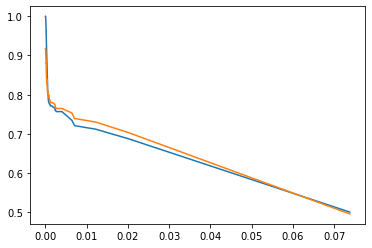

In [138]:
plt.plot(ccp_alphas,train_data_acc)
plt.plot(ccp_alphas,test_data_acc)

In [139]:
# we have to select point where we get maximum train and test data accuracy 

In [140]:
max(test_data_acc)

0.9177652228499686

In [141]:
index = np.argmax(test_data_acc)
index                                 # we got 4 index where we will get maxt acc for train and test dataset

0

In [142]:
test_data_acc[index]

0.9177652228499686

In [143]:
train_data_acc[index]

1.0

In [144]:
# again build model using ccp alpha and evalute the model

In [145]:
dt_pru_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0,max_depth=9,min_samples_leaf=4,min_samples_split=4)
dt_pru_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=9, min_samples_leaf=4,
                       min_samples_split=4, random_state=10)

# Evalution of model after post-prunning :

# evalution of train dataset:

In [146]:
y_pred_train = dt_pru_model.predict(x_train)
y_pred_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [147]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[5357, 1001],
       [1163, 5219]], dtype=int64)

In [148]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6358
           1       0.84      0.82      0.83      6382

    accuracy                           0.83     12740
   macro avg       0.83      0.83      0.83     12740
weighted avg       0.83      0.83      0.83     12740



In [149]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.8301412872841444

# evalution of test dataset:

In [150]:
y_pred_test = dt_pru_model.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [151]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[1301,  304],
       [ 331, 1250]], dtype=int64)

In [152]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1605
           1       0.80      0.79      0.80      1581

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [153]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.8006905210295041

# 3.Random Forest:

In [93]:
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

# Evaluation of model before hyperparameter tunning:

# evalution of train dataset:

In [94]:
y_pred_train = rf.predict(x_train)
y_pred_train

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [95]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[6358,    0],
       [   0, 6382]], dtype=int64)

In [96]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6358
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



In [97]:
acc = accuracy_score(y_train,y_pred_train)
acc

1.0

# evaluation of test dataset:

In [98]:
y_pred_test = rf.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [99]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[1486,  119],
       [  33, 1548]], dtype=int64)

In [100]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1605
           1       0.93      0.98      0.95      1581

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



In [101]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.9522912743251726

# hyperparameter tunning:

In [103]:
rf_hyp = RandomForestClassifier()
hyperparameters={'n_estimators': [10, 20, 30],
                 'max_depth': [5, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
gscv_rf_model = GridSearchCV(rf_hyp,hyperparameters,cv=5)
gscv_rf_model.fit(x_train,y_train)
gscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=20)

In [104]:
# build model using hyperparameter tunning:

In [105]:
rf_hyp_model = gscv_rf_model.best_estimator_
rf_hyp_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

# Evaluation of model after hyperparameter tunning:

# evaluation for train dataset:

In [106]:
y_pred_train = rf_hyp_model.predict(x_train)
y_pred_train

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [107]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[5673,  685],
       [ 740, 5642]], dtype=int64)

In [108]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6358
           1       0.89      0.88      0.89      6382

    accuracy                           0.89     12740
   macro avg       0.89      0.89      0.89     12740
weighted avg       0.89      0.89      0.89     12740



In [109]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.8881475667189953

# evalution for test dataset:

In [110]:
y_pred_test = rf_hyp_model.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [111]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[1381,  224],
       [ 222, 1359]], dtype=int64)

In [112]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1605
           1       0.86      0.86      0.86      1581

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [113]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.8600125549278091

# 4.Adaboost

In [115]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

# Evaluation of model before hyperparameter tunning:

# evaluation of train dataset:

In [116]:
y_pred_train = ada.predict(x_train)
y_pred_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [117]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[5057, 1301],
       [1623, 4759]], dtype=int64)

In [118]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6358
           1       0.79      0.75      0.76      6382

    accuracy                           0.77     12740
   macro avg       0.77      0.77      0.77     12740
weighted avg       0.77      0.77      0.77     12740



In [119]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.7704866562009419

# evaluation of test dataset:

In [120]:
y_pred_test = ada.predict(x_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [121]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[1297,  308],
       [ 380, 1201]], dtype=int64)

In [122]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1605
           1       0.80      0.76      0.78      1581

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [123]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.7840552416823603

# hyperparameter tunning:

In [124]:
ada_hyp = AdaBoostClassifier(random_state=10)
hyperparameters = {'n_estimators':[10,20,30],
                  'learning_rate':[0.01]}
gscv_ada_hyp = GridSearchCV(ada_hyp,hyperparameters,cv=5)
gscv_ada_hyp.fit(x_train,y_train)
gscv_ada_hyp.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=10, random_state=10)

In [125]:
ada_hyp_model = gscv_ada_hyp.best_estimator_
ada_hyp_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=10, random_state=10)

# Evaluation of model after hyperparameter tunning:

# evaluation of train dataset:

In [126]:
y_pred_train = ada_hyp_model.predict(x_train)
y_pred_train

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [127]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[5035, 1323],
       [2585, 3797]], dtype=int64)

In [128]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      6358
           1       0.74      0.59      0.66      6382

    accuracy                           0.69     12740
   macro avg       0.70      0.69      0.69     12740
weighted avg       0.70      0.69      0.69     12740



In [129]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.6932496075353218

# evaluation of test dataset:

In [130]:
y_pred_test = ada_hyp_model.predict(x_test)
y_pred_test

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [131]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[1281,  324],
       [ 611,  970]], dtype=int64)

In [132]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1605
           1       0.75      0.61      0.67      1581

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.70      3186
weighted avg       0.71      0.71      0.70      3186



In [133]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.7065285624607659

# create pickle file of model :

In [140]:
with open('rf_hyp_model.pkl','wb') as f:
    pickle.dump(rf_hyp_model,f)

In [141]:
predict_data_project1 = {'Gender': {'Male': 0, 'Female': 1},
                'column': df.columns.tolist()}
predict_data_project1

{'Gender': {'Male': 0, 'Female': 1},
 'column': ['CreditScore',
  'Gender',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Exited',
  'Geography_France',
  'Geography_Germany',
  'Geography_Spain']}

In [144]:
with open('predict_data_project1.json','w') as f:
    json.dump(predict_data_project1,f)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  object 
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  int32  
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  int32  
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(1), int32(5), int64(6), object(1)
memory usage: 820.4+ KB


In [146]:
df['Age'] = df['Age'].astype(int)


In [147]:
df['CreditScore'] = df['CreditScore'].astype(int)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        10000 non-null  int32
 1   Gender             10000 non-null  int64
 2   Age                10000 non-null  int32
 3   Tenure             10000 non-null  int64
 4   Balance            10000 non-null  int32
 5   NumOfProducts      10000 non-null  int64
 6   HasCrCard          10000 non-null  int64
 7   IsActiveMember     10000 non-null  int64
 8   EstimatedSalary    10000 non-null  int32
 9   Exited             10000 non-null  int64
 10  Geography_France   10000 non-null  int32
 11  Geography_Germany  10000 non-null  int32
 12  Geography_Spain    10000 non-null  int32
dtypes: int32(7), int64(6)
memory usage: 742.3 KB


# comparison of accuracies of algorithms : 

In [157]:
dict1 = {'train_acc_before_hyp':[66,100,100,77],
        'test_acc_before_hyp':[67,91,95,78],
        'train_acc_after_hyp':[66,82,89,69],
        'test_acc_after_hyp':[69,80,86,70]}
pd.DataFrame(dict1,index=['Logistic Regression','Decision Tree','Random Forest','Adaboost'])

train_acc_before_hyp  test_acc_before_hyp  \
Logistic Regression                    66                   67   
Decision Tree                         100                   91   
Random Forest                         100                   95   
Adaboost                               77                   78   

                     train_acc_after_hyp  test_acc_after_hyp  
Logistic Regression                   66                  69  
Decision Tree                         82                  80  
Random Forest                         89                  86  
Adaboost                              69                  70